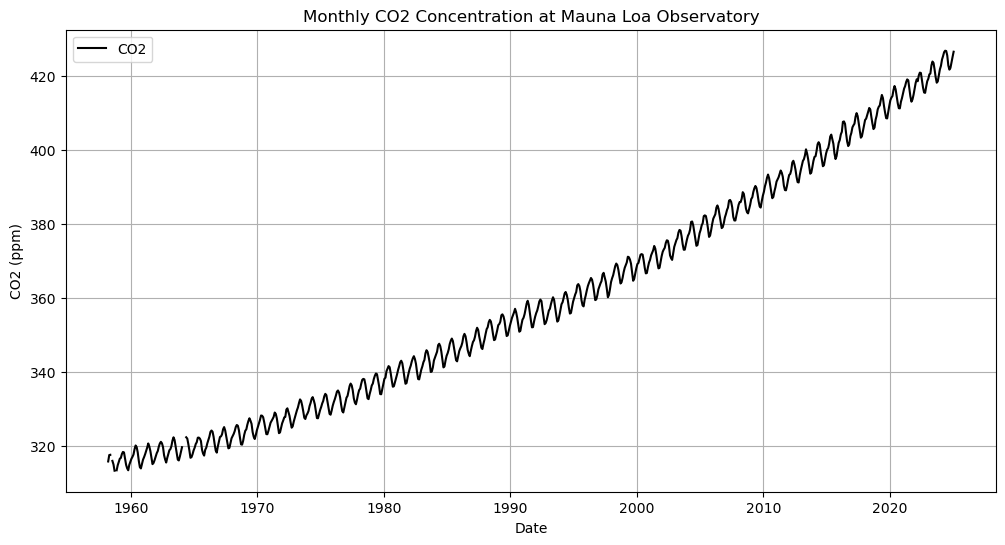

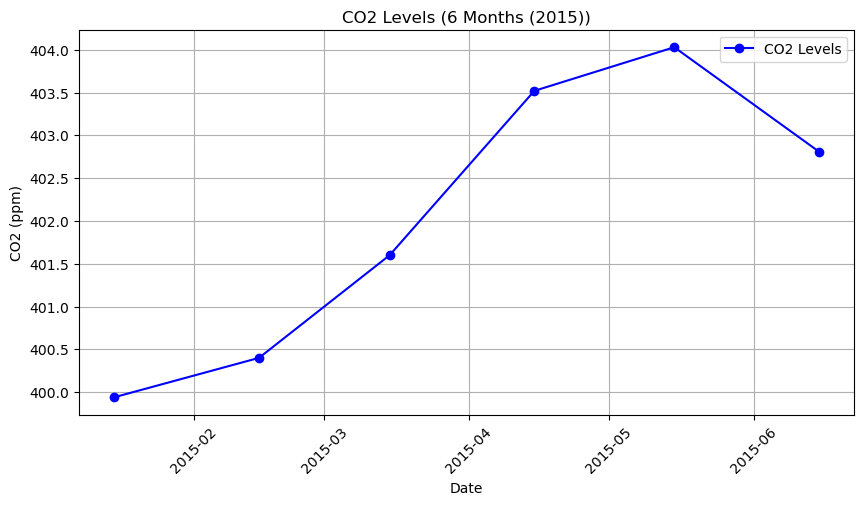

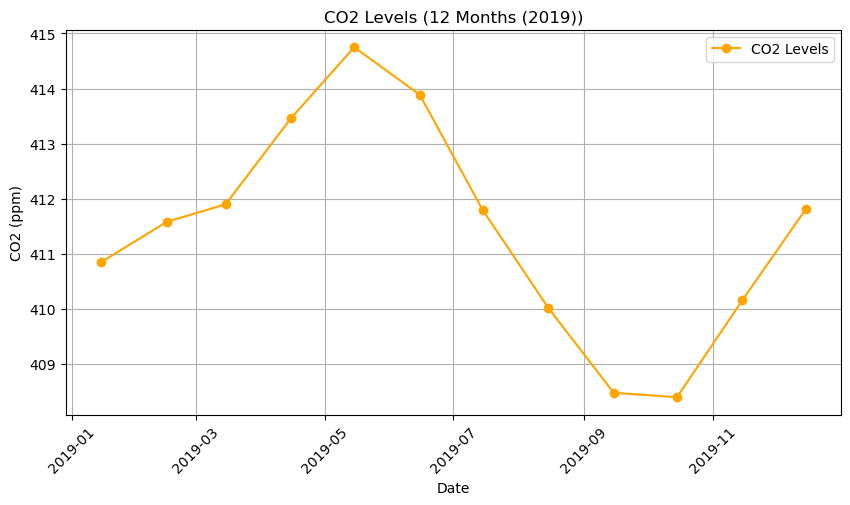

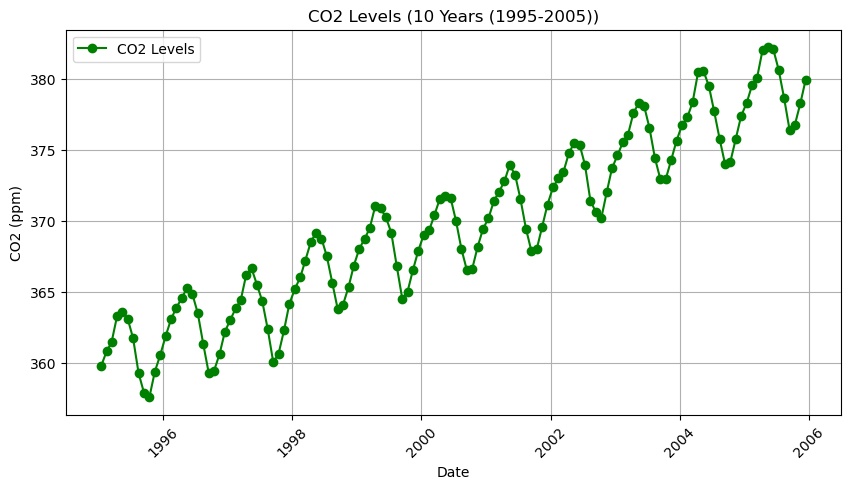

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = ("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv")

column_names = [
    "Yr", "Mn", "Date_Excel", "Date_Fractional",
    "CO2", "CO2_Seasonally_Adjusted", "CO2_Fit",
    "CO2_Fit_Seasonally_Adjusted", "CO2_Filled",
    "CO2_Filled_Seasonally_Adjusted", "Station",
]

df = pd.read_csv(url, skiprows=64, names=column_names)

# Convert to datetime and set index
df["Date"] = pd.to_datetime({"year": df["Yr"], "month": df["Mn"], "day": 15})
df.set_index("Date", inplace=True)
df.drop(columns=["Yr", "Mn", "Date_Excel", "Date_Fractional"], inplace=True)
df.replace([-99.99, ""], np.nan, inplace=True)

# Plot full dataset
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["CO2"], label="CO2", color="black")
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.title("Monthly CO2 Concentration at Mauna Loa Observatory")
plt.legend()
plt.grid(True)
plt.show()

### Filtering and Plotting

# Define different time periods
periods = {
    "6 Months (2015)": ("2015-01-01", "2015-06-30", "blue"),
    "12 Months (2019)": ("2019-01-01", "2019-12-30", "orange"),  # <-- Changed color to orange
    "10 Years (1995-2005)": ("1995-01-01", "2005-12-30", "green")
}

for period_name, (start_date, end_date, color) in periods.items():
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)

    # Filter DataFrame
    df_filtered = df.loc[start:end]

    # Plot the data with custom color
    plt.figure(figsize=(10, 5))
    plt.plot(df_filtered.index, df_filtered["CO2"], marker='o', linestyle='-', label="CO2 Levels", color=color)
    plt.xlabel("Date")
    plt.ylabel("CO2 (ppm)")
    plt.title(f"CO2 Levels ({period_name})")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()